In [1]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('mall customers.csv')

In [4]:
df = df.drop('CustomerID', axis=1)

In [5]:
df = df.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df.Gender = le.fit_transform(df['Gender'])

In [8]:
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


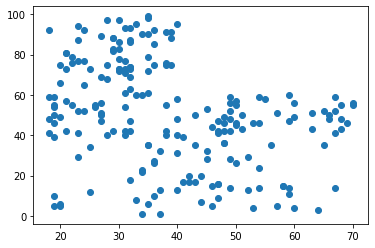

In [9]:
plt.scatter(df['Age'], df['score'])

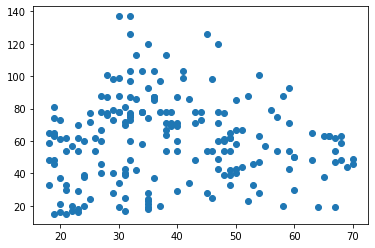

In [10]:
plt.scatter(df['Age'], df['income'])

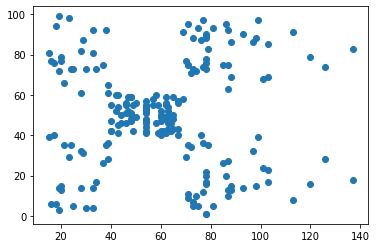

In [11]:
plt.scatter(df['income'], df['score'])

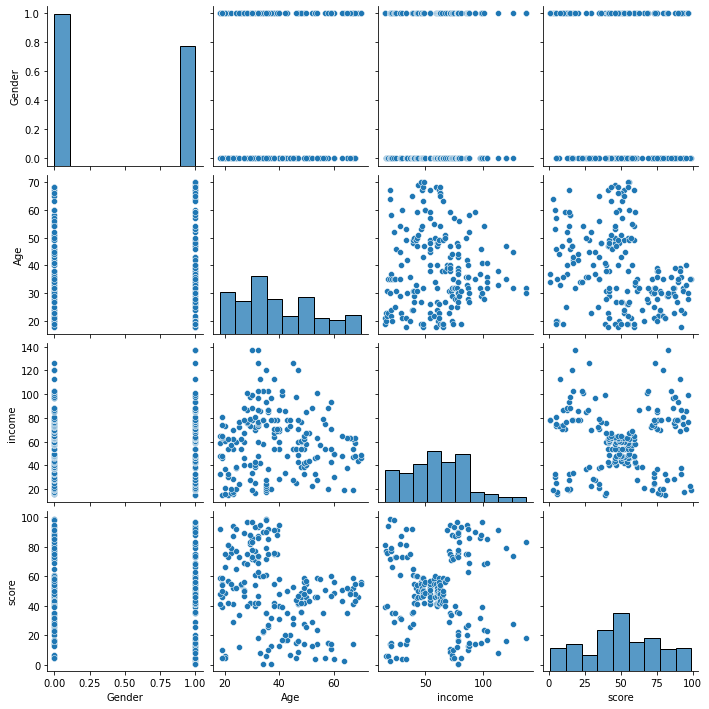

In [12]:
sns.pairplot(df[['Gender','Age', 'income', 'score']])

# K-MEANs Clustering

In [13]:
import sklearn.cluster as cluster

In [14]:
kmeans = cluster.KMeans() 

In [15]:
predicted = kmeans.fit_predict(df[['Gender','Age', 'income', 'score']])

In [16]:
predicted

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 1,
       5, 4, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6])

In [17]:
df['predicted_Cluster'] = predicted

In [18]:
df.predicted_Cluster.unique() #To check the number of clusters

array([5, 4, 3, 1, 0, 2, 6, 7])

In [19]:
df1 = df[df.predicted_Cluster == 0]
df2 = df[df.predicted_Cluster == 1]
df3 = df[df.predicted_Cluster == 2]
df4 = df[df.predicted_Cluster == 3]
df5 = df[df.predicted_Cluster == 4]
df6 = df[df.predicted_Cluster == 5]
df7 = df[df.predicted_Cluster == 6]
df8 = df[df.predicted_Cluster == 7]

In [21]:
print(kmeans.cluster_centers_)  # final centroids

[[  0.46428571  32.78571429  78.03571429  81.89285714]
 [  0.34210526  27.          56.65789474  49.13157895]
 [  0.68        41.96        79.64        15.4       ]
 [  0.44444444  56.15555556  53.37777778  49.08888889]
 [  0.40909091  25.27272727  25.72727273  79.36363636]
 [  0.38095238  44.14285714  25.14285714  19.52380952]
 [  0.45454545  32.45454545 108.18181818  82.72727273]
 [  0.3         41.         109.7         22.        ]]


In [23]:
kmeans.predict([[0,23,70,29]])

array([1])

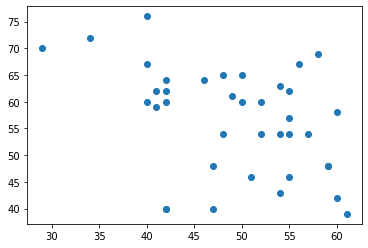

In [24]:
plt.scatter(df2['score'], df2['income'])

# Tunning and Cluster Optimization

In [25]:
from sklearn.cluster import KMeans

wcss = []

clusters = range(1,15)

for k in range(1,15):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df[['Gender','Age', 'income', 'score']])
    wcss.append(kmeans2.inertia_)  # inertia_ = Sum of the squared error , SSE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331505,
 51203.75391673208,
 44391.82080487078,
 40670.989962363215,
 37401.898338558,
 34574.93653779171,
 32324.277951933138,
 30174.644748198425,
 27649.08521303258]

# To find the optimized no of clusters

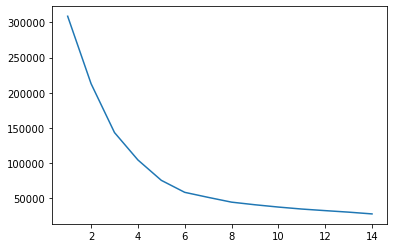

In [27]:
plt.plot(clusters , wcss) # elbow method

# Kneed Installation

In [29]:
!pip install kneed

In [30]:
from kneed import KneeLocator
kn = KneeLocator(clusters , wcss, curve='convex', direction = 'decreasing' )

In [31]:
optimal_num_cluster = kn.knee
print('optimal_num_cluster = ', optimal_num_cluster)

optimal_num_cluster =  5


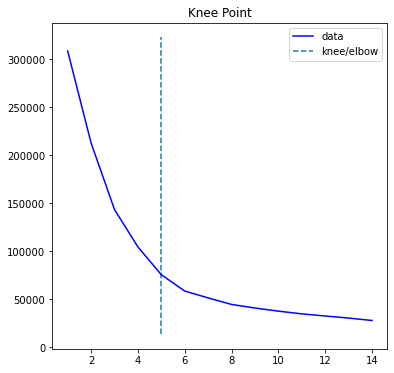

In [32]:
kn.plot_knee()

# Tuning K=5

In [33]:
kmeans = cluster.KMeans(n_clusters=5)